# Requirements

## Locally
https://github.com/CSCfi/csc-quantum-tools in your $PYTHONPATH (e.g `export PYTHONPATH=~/github/csc-quantum-tools/src`)  or in your site-packages

https://github.com/FiQCI/qiskit-terra in your python env `pip install .` in the directory. 

## LUMI

`module use /appl/local/quantum/modulefiles/`
And
`module load helmi_qiskit`


## Import the relevant packages

In [16]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# import os
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit import transpile


# from qiskit import IBMQ, transpile
# from qiskit import Aer
# from qiskit import QuantumCircuit
# from qiskit.providers.aer import AerSimulator


# import numpy as np


from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt

from csc_qu_tools.qiskit.mock import FakeHelmi

## Create the 4-Qubit-GHZ circuit

In [6]:
n_qubits = 4
qreg = QuantumRegister(n_qubits, "qB")
creg = ClassicalRegister(n_qubits, "c")
circ = QuantumCircuit(qreg, creg)

# Test Circuit
circ.h(qreg[2])
for qb in [0, 1, 3]:
    circ.cx(qreg[2], qreg[qb])
circ.measure(range(4), range(4))
print(circ)

           ┌───┐     ┌─┐              
qB_0: ─────┤ X ├─────┤M├──────────────
           └─┬─┘┌───┐└╥┘     ┌─┐      
qB_1: ───────┼──┤ X ├─╫──────┤M├──────
      ┌───┐  │  └─┬─┘ ║      └╥┘┌─┐   
qB_2: ┤ H ├──■────■───╫───■───╫─┤M├───
      └───┘           ║ ┌─┴─┐ ║ └╥┘┌─┐
qB_3: ────────────────╫─┤ X ├─╫──╫─┤M├
                      ║ └───┘ ║  ║ └╥┘
 c: 4/════════════════╩═══════╩══╩══╩═
                      0       1  2  3 


## Set the backend

In [20]:
backend = FakeHelmi()

# What does the noise model look like?
noise_model = NoiseModel.from_backend(backend)
print(noise_model)

NoiseModel:
  Basis gates: ['cz', 'r']
  Instructions with noise: ['measure', 'cz', 'r']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('r', (0,)), ('r', (1,)), ('r', (3,)), ('r', (4,)), ('cz', (0, 2)), ('cz', (1, 2)), ('cz', (3, 2)), ('cz', (4, 2)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


## Run the circuit and see the distribution

Noisy simulation from backend:  {'1010': 9, '0010': 45, '0000': 308, '1101': 29, '0011': 9, '0111': 37, '1011': 19, '0001': 44, '1111': 352, '1001': 5, '0101': 7, '1110': 45, '1100': 10, '0110': 13, '1000': 48, '0100': 20}
352 308
660


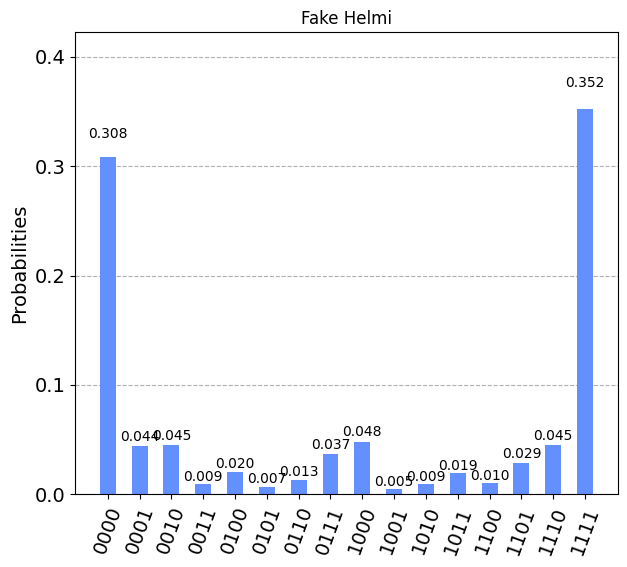

In [21]:

basis_gates = ['r', 'cz']
circuit_decomposed = transpile(circ, basis_gates=basis_gates)

job = backend.run(circuit_decomposed, shots=1000)

counts_noise_backend = job.result().get_counts()

print("Noisy simulation from backend: ", counts_noise_backend)


print(counts_noise_backend['1111'], counts_noise_backend['0000'])
print(counts_noise_backend['1111']+counts_noise_backend['0000'])
plot_histogram(counts_noise_backend, title='Fake Helmi', figsize=(7, 6))


## What does the real distribution look like?

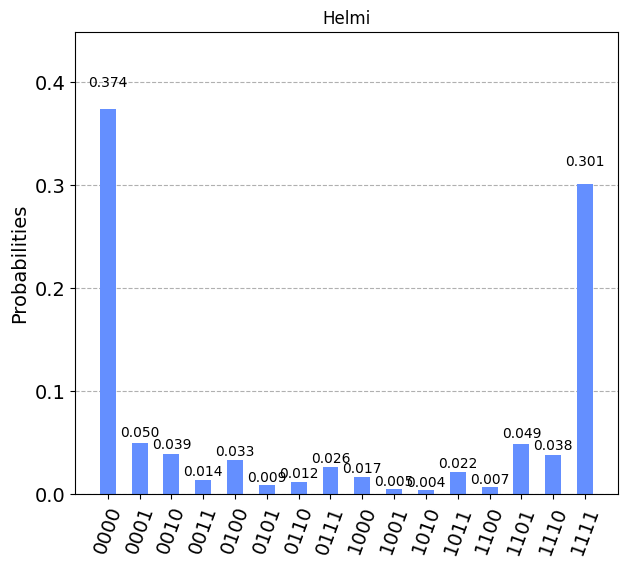

In [24]:
# Results from 14-09-2022 Calibrations
actual_helmi_counts = {'0000': 374, '1111': 301, '0010': 39, '1001': 5, '0001': 50, '0110': 12, '0111': 26, '1110': 38, '1011': 22, '0101': 9, '1101': 49, '0011': 14, '1100': 7, '0100': 33, '1010': 4, '1000': 17}
plot_histogram(actual_helmi_counts, title='Helmi', figsize=(7, 6))